## Support Vector Classifier Implementation

In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [432]:
from sklearn.datasets import make_classification

In [433]:
X,y=make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [434]:
X

array([[-0.36904483,  0.5747046 ],
       [ 1.26382888,  1.1142953 ],
       [-0.28137003,  0.75912042],
       ...,
       [ 0.14086895, -0.71895319],
       [-1.42901999, -0.13204693],
       [-1.16784032, -1.10479208]])

In [435]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [436]:
pd.DataFrame(X)[0]

0     -0.369045
1      1.263829
2     -0.281370
3     -1.275844
4     -1.916995
         ...   
995    2.101465
996    1.587437
997    0.140869
998   -1.429020
999   -1.167840
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

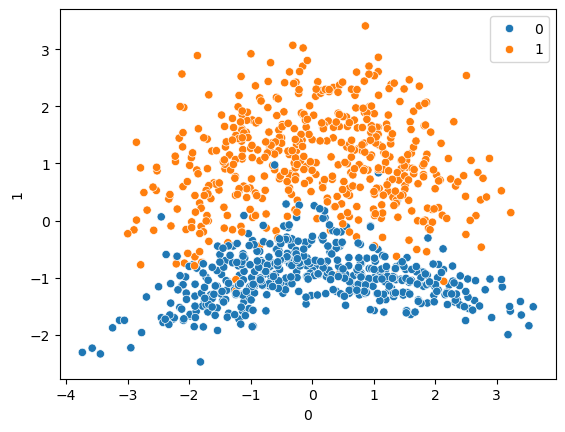

In [437]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)

In [438]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=10)

In [439]:
svc=SVC(kernel='linear')

In [440]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [441]:
y_pred=svc.predict(X_test)

In [442]:
from sklearn.metrics import classification_report, confusion_matrix

In [443]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.91      0.90      0.90       127

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[112  11]
 [ 13 114]]


In [444]:
rbf=SVC(kernel='rbf')

In [445]:
rbf.fit(X_train, y_train)

SVC()

In [446]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [447]:
y_pred1=svc.predict(X_test)

In [448]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.91      0.90      0.90       127

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[112  11]
 [ 13 114]]


## Hyperparameter Tuning with SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [450]:
grid=GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [451]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [452]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [453]:
y_pred2=grid.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       123
           1       0.95      0.91      0.93       127

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[117   6]
 [ 12 115]]
